# **Corporate Finance for Analytics - Group Work #1: Relative Valuation Algorithm**


#### In this Notebook you will find an step-by-step guide and tips on how to solve Group Work project #1

# **STEP 1: Accessing Fundamental Company Information**

#### Let's start by importing some libraries that we will need down the road (later we may ned to import more)

In [1]:
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt
from time import sleep

#### For simplicity in the process we will be using Fundamental Data for U.S. firms through the free AlphaVantage API.

#### Please note that this is valid only for U.S. publicly traded firms. It may be the case (small, relatively young firms) that you do not find here the complete universe of publicly traded firms, though. In any case, just check using the ticker feature whereas the data is there or not!

#### Here I have used a free API key here (my API key). Feel free to use it, but note that depending on the level of data downloads that you all perform this may reach the available day-limit. For that reason, **I strongly recommend that you create your own API key (it's completely free!) in the AlphaVantage website: https://www.alphavantage.co**

In [ ]:
# Installing the AlphaVantage library to download stuff!
!pip install alpha_vantage  

In [2]:
APIkey='544L3PNZRDDN4QTU'           # Defining API key (this is what you should change if you access with your own API key)
from alpha_vantage.fundamentaldata import FundamentalData   # Importing the FundamentalData module
bs = FundamentalData(key=APIkey, output_format='pandas')    # Defining the way I want my output to look like

#### Let's now do a quick example on how to download directly from the API fundamental information on 1 stock (e.g., American Airlines, ticker='AAL').

#### **We will start by downloading Quarterly Balance Sheet Data:**

In [ ]:
ticker='AAL'     # Select the ticker for the company I want the fundamental data from (you can also do this direclty in the data call)
data_bs,_ = bs.get_balance_sheet_quarterly(ticker)   # This will gather Annual Balance Sheet data and store it in data_bs as a DataFrame
data_bs.set_index(data_bs['fiscalDateEnding'],inplace=True)  # This sets the index of the Dataframe to be the fiscal date of the data
data_bs.head(5) # Displays quarterly data for the last 5 fiscal years. You can consult it this way or just export it to excel using pd.to_excel()

#### Now, we will turn to **download Quarterly Income Statement info:**

In [ ]:
data_is,_ = bs.get_income_statement_quarterly(ticker)  # Gather annual data from the Income Statement of the company.
data_is.set_index(data_is['fiscalDateEnding'],inplace=True)
data_is.head()

#### *Additional Content: Although it is not strictly needed for this assignment, note that you can also download information for the Cash-flow statement (and more):*

In [ ]:
data_cf,_ = bs.get_cash_flow_quarterly(ticker)
data_cf.set_index(data_cf['fiscalDateEnding'],inplace=True)
data_cf.head()

#### In order to better work with the data, we can **put together in the same DataFrame Balance Sheet and Income Statement information**:

In [ ]:
data= data_bs.join(data_is,lsuffix='_bs',rsuffix='_is') # Prefix and suffix help identify the source of the variable when there are 2 variables called equally. 
data.head()

#### **Finally, we will create a new Column in the DataFrame 'data' that recognizes the Ticker/Company to which the info corresponds (you will see the use for this one later!)**

In [ ]:
data.insert(2,'Ticker', ticker)
data.head()

**-------------------------------------------------------------------------------------------------------------------------------------------------------**
# $\color{red}{\textbf{TO-DO for Students in this Step 1:}}$

#### You have just seen how to gather fundamental information for 1 stock from the AlphaVantage API. Now to complete Step 1 of the Group Work you are required to automatize the process to do the same thing for several companies. 

#### **$\color{blue}{\textbf{Task 1}}$- Here, first thing you should note is that it will be extremely useful to work more efficiently to define a Python function 'fundamental_info' that aggregates all the past tasks and makes the process smoother. Specifically, we need to get info on (i) Balance Sheet, (ii) Income Statement; (iii) join both of them together in the same DataFrame; and (iv) insert the Tikcer of the company as an identifying column.**

In [3]:
#Aquí lo que queremos hacer es automatizar los pasos de arriba. A través de una función juntar todos los pasos y que solo haya que poner fundamental_info(ticker) y que ya te devuelve la tabla
def fundamental_info(ticker):
    data_bs,_=bs.get_balance_sheet_quarterly(ticker) #Esto recoge datos anuales del Balance Sheet y los guarda en un dataframe de nombre data_bs
    data_bs.set_index(data_bs['fiscalDateEnding'],inplace=True) #Pone la fecha fiscal 
    data_is,_= bs.get_income_statement_quarterly(ticker) #Recogemos los datos del Income Statement
    data_is.set_index(data_bs['fiscalDateEnding'],inplace=True)
    data= data_bs.join(data_is,lsuffix='_bs',rsuffix='_is') #Unimos el Balance Sheet y el Income Statement
    data.insert(2,'Ticker', ticker) #Crea una nueva columna que indica a que empresa pertenece la información
    
    return data

#### **$\color{blue}{\textbf{Task 2}}$ - Now, let's use that function to create a loop over all the companies that we want to extract info from. Use a dictionary 'df' to store the info output from the fundamental_info function of before.**

##### **Warning**: *Note that the AlphaVantage API has a limited number of calls per minute (and a daily maximum). If you exceed this limit you will have to wait for 1 minute to run your queries to get data from the API. The error you are likely to encounter would be something like:*

##### *----- ValueError: Thank you for using Alpha Vantage! Our standard API call frequency is 5 calls per minute and 500 calls per day. Please visit https://www.alphavantage.co/premium/ if you would like to target a higher API call frequency. -----*

In [4]:
peer_tickers = ("JNJ","PFE","MRK","ABBV","MMM","ABT","TMO")  # This list will contain the different Tickers you are assigned in string format, eg. 'AAL'. 

# The AlphaVantage API collapses given the downloaded information for 2 tickers. 
# In order to import info for more than 2 tickers we may use the module 'time' and the 'sleep' functionality.

In [31]:
df = {}  # Create 'df' dictionary to assign names later on! If doubts, check how dictionaries work!
for i in range(len(peer_tickers)):
    df[peer_tickers[i]]=fundamental_info(peer_tickers[i])
        
    sleep(45)  # This command 'pauses' the loop for 45seconds between iterations in order to overcome the limit created by AlphaVantage

In [6]:
print(df)

{'JNJ':                  fiscalDateEnding_bs reportedCurrency_bs Ticker   totalAssets  \
fiscalDateEnding                                                                
2021-06-30                2021-06-30                 USD    JNJ  176440000000   
2021-03-31                2021-03-31                 USD    JNJ  172557000000   
2020-12-31                2020-12-31                 USD    JNJ  174894000000   
2020-09-30                2020-09-30                 USD    JNJ  170693000000   
2020-06-30                2020-06-30                 USD    JNJ  158380000000   
2020-03-31                2020-03-31                 USD    JNJ  155017000000   
2019-12-31                2019-12-31                 USD    JNJ  157728000000   
2019-09-30                2019-09-30                 USD    JNJ  155521000000   
2019-06-30                2019-06-30                 USD    JNJ  155117000000   
2019-03-31                2019-03-31                 USD    JNJ  150027000000   
2018-12-31          

**-------------------------------------------------------------------------------------------------------------------------------------------------------**

# **STEP 2: Getting Share Price Data** 

#### Another important source of information that we need for our project is share prices. Since we want our results to show daily evolution of rations, we are going to get daily prices. Then we will conform these to the fundamental information data to get daily time-series in our DataFrames.

#### There are multiple ways to get daily stock prices, most of them completely free (e.g., yfinance library from Yahoo! Finance). Since que are already using the AlphaVantage API for the fundamental information data, let's retrieve from this source also stock price data:

In [7]:
from alpha_vantage.timeseries import TimeSeries   # Import the funcionalities so that we access the TimeSeries module to get daily prices
ts = TimeSeries(key=APIkey, output_format='pandas')

In [ ]:
data,_ = ts.get_daily_adjusted(symbol=ticker, outputsize='full')  # Download stock information data & metadata
data.sort_index(axis = 0, inplace = True)  # This part ensures that the data is sorted ;)
prices = pd.DataFrame(data['5. adjusted close'].loc['2016-03-31':'2021-03-31'])   # Select the info we want (adjusted price!) & time-frame we want (from Q1-2016 to Q1-2021)
prices.rename(columns={'5. adjusted close':ticker},inplace=True)      # Change the name of the column for the ticker
prices.head()
print(prices)

**-------------------------------------------------------------------------------------------------------------------------------------------------------**
# $\color{red}{\textbf{TO-DO for Students in this Step 2:}}$

#### **Can you now do this for all peer stocks? Create a loop to perform this same process but using the stock ticker stored in peer_tickers. You should think about appending a new column to the main DataFrame in each iteration of the loop.**

#### *Hint: You may want to proceed in 2 steps as before. **First create a simple function to perform the task**. Then, you can use a **loop on this function**.*

#### **$\color{blue}{\textbf{Task 3}}$: Create a function to perform the price extraction operation. Use the previous code given to you to do it. Do not forget to execute the previous code with the new necessary libraries!**

In [8]:
def get_prices(ticker, start, end):
    # This is where your code should go! (around 3 lines of code)
    data,_ = ts.get_daily_adjusted(symbol=ticker, outputsize='full')
    data.sort_index(axis = 0, inplace = True)  
    prices = pd.DataFrame(data['5. adjusted close'].loc[start:end])
    prices.rename(columns={'5. adjusted close':ticker},inplace=True) #Ponerlo más bonito
    return prices  

#### **$\color{blue}{\textbf{Task 4}}$: Use a loop on this function to extract prices for all firms needed (peer_ticker). Make sure you store all of the prices in a DataFrame where 'date' acts as index and each column contains the price-series for 1 stock. Make sure you understand the syntaxis in the following cell to adapt your code consequently.**

In [9]:
peer_prices = pd.DataFrame() # Create an empty DataFrame to be filled
start='2016-03-31'           # Define Start period
end= '2021-07-01'            # Define End period

for i in range(len(peer_tickers)):
    # This is where your code should go! (around 3 lines of code)
    # For this task, I suggest you check the pandas.concat() feature. It will definitely help!
    new_df=get_prices(peer_tickers[i],start,end)
    peer_prices=pd.concat([peer_prices,new_df], axis=1)
    new_df=[]
    sleep(30) # Remember to keep the sleep command to overcome hitting the AlphaVantage daily limit.

peer_prices.head()

,JNJ,PFE,MRK,ABBV,MMM,ABT,TMO
date,,,,,,,
2016-03-31,93.502720,22.848304,42.672551,44.185143,141.705864,37.600561,139.340589
2016-04-01,94.358244,23.156648,43.309696,44.417208,142.471245,37.924161,140.403431
2016-04-04,93.839745,23.680833,43.874254,45.801861,141.510267,38.041017,141.761507
2016-04-05,94.150845,24.174184,43.745212,45.283583,141.008518,37.789328,139.133925
2016-04-06,94.557002,25.384435,44.866264,46.327875,141.858940,38.697206,142.804667


In [10]:
print(peer_prices)

                   JNJ        PFE        MRK        ABBV         MMM  \
date                                                                   
2016-03-31   93.502720  22.848304  42.672551   44.185143  141.705864   
2016-04-01   94.358244  23.156648  43.309696   44.417208  142.471245   
2016-04-04   93.839745  23.680833  43.874254   45.801861  141.510267   
2016-04-05   94.150845  24.174184  43.745212   45.283583  141.008518   
2016-04-06   94.557002  25.384435  44.866264   46.327875  141.858940   
...                ...        ...        ...         ...         ...   
2021-06-25  163.235787  38.627934  76.510335  110.424155  193.276733   
2021-06-28  163.046914  38.766670  76.173373  110.443702  195.013494   
2021-06-29  163.056855  38.746850  76.520246  109.759538  194.547050   
2021-06-30  163.762643  38.806308  77.075243  110.091846  197.127381   
2021-07-01  164.975405  39.202696  77.293278  111.675198  197.583901   

                   ABT         TMO  
date                      

**-------------------------------------------------------------------------------------------------------------------------------------------------------**

# **STEP 3: Prepare Data for Calculation of Multiples** 

#### In this next step we are going to filter the data we need, prepare and process it, in order to later on be able to calculate ratios in a simple manner.

#### First we need to define the data that we will need to use based on the ratios that we want to calculate: 

## **Step 3.1: Filter data for calculating PE.** 

#### **What info (and how) do we need in order to compute daily PE ratios?**

#### 1- **Daily adjusted close prices**    $\checkmark$  Nice! We already got these!

#### 2- **Number of shares**  *Note that since we got adjusted prices we just need the last available number of shares outstanding!*



In [ ]:
df['JNJ']['commonStockSharesOutstanding'].iloc[0]  # This iloc[] function helps us get the last available number of shares outstanding.
                                                  # Note that data is indexed from most recent to oldest info (that why we use index 0)

#### 3- **Earnings figure**: There are 2 things that we have to take into account here:

> #### **- We have quarterly earnings figures, but need the annualized ones.** The accurate approach here is to annualized these earnings by computing the Trailing Twelve Months (TTM) earnings. *See more here: https://www.investopedia.com/terms/t/ttm.asp*


In [ ]:
# In order to do this, we can use the rolling() and sum() features. 
# Here you have an example on how to perform this operation on the variable example 'test':
test = df['JNJ'].sort_index()['netIncome']
test.rolling(4, min_periods=4).sum()

> #### **- We also have to be very careful regarding the dates of the Earnings release.** Earnings are published on a (more or less) quarterly basis. Obviously, multiples are updated on these releases so we have to be very careful of the exact date when Earnings are published in order to accurately calculate them! **Note that this will happen for every accounting variable (i.e., Net Income, EBITDA, ...)!!**

> #### **The main repository for accessing the publication dates of quarterly company reports in the U.S. is the SEC.** Here you have a link to the website containing all the information on quarterly announcements: https://www.sec.gov/Archives/edgar/full-index/2021/QTR1/

> #### **Example AAL:** https://sec.report/Ticker/AAL

> #### Next, you have an example and a function that facilitates the crawling. Make sure you understand the whole process here so as to then use it for the Tasks:

In [11]:
# Some extra libraries that we need to import in order to proceed with the crawler
import bs4
import datetime
import requests
import re

In [12]:
def get_earnings_dates(ticker, start, end):
    '''
    This function retrieves a list with the dates from Earnings Reports retrieved from SEC. Careful with requests limit!
    '''
    url = 'https://www.sec.gov/cgi-bin/browse-edgar?type=10-&dateb=&owner=include&count=100&action=getcompany&CIK=%s' % ticker
    headerInfo={'User-Agent': 'Mozilla/5.0'}
    response = requests.get(url,headers=headerInfo, timeout=10)
    response.raise_for_status()
    soup = bs4.BeautifulSoup(response.text, 'html.parser')
    trElems = soup.select('tr')
    dateFind = re.compile(r'2\d{3}-\d{2}-\d{2}')

    # Currently the SEC allows for a maximum of 10 requests per second. More than that you will encounter an error.

    earnings_dates = []
    for tr in trElems:
        tdElems = tr.select('td')
        if len(tdElems) == 5 and dateFind.search(tdElems[3].getText()) != None:
            date = tdElems[3].getText()
            converted = datetime.datetime.strptime(date,'%Y-%m-%d').strftime('%Y-%m-%d')
            if start<converted<end:
                earnings_dates.append([converted])
    if earnings_dates==[]:
        print('No dates found for '+ticker)
       
    return earnings_dates

In [ ]:
# Careful with running this function lots of times, since the SEC has a query limit per minute!
start_date = df['NVS'].sort_index().index[0]    # We need to see where the data starts in order to match the time-horizon
end_date = '2021-12-31' # This is our end date, which can change!
dates_earnings = np.unique(get_earnings_dates('NVS',start_date,end_date)) # Also careful with this! unique() ensures that there are no duplicates in the dates!

In [ ]:
# To verify that we get the same number of observations as in the Earnings list
len(dates_earnings)==len(df['AAA']['netIncome'])

In [ ]:
# Then, we incorporate this as a new column in our DataFrame with fundamental information
df['AAL'].sort_index(inplace=True)    # We reverse the order in the fundamental data so to match the same dates order as in the Earnings dates list (we used to have more recent first in the dataframe from AlphaVantage)
df['AAL']['10Q Date'] = np.array(dates_earnings)
df['AAL'].head()

> #### Finally, we can **redefine the date index for the fundametal information as the 10Q release date!**

In [ ]:
df['AAL'].set_index('10Q Date', inplace=True) # This makes sure that our new date_index in the DataFrame is the real 10Q release dates!

In [ ]:
df['AAL'].head()

**-------------------------------------------------------------------------------------------------------------------------------------------------------**
# $\color{red}{\textbf{TO-DO for Students in this Step 3.1.:}}$

#### **$\color{blue}{\textbf{Task 5}}$: Create a new Dictionary, named 'shares', that contains the last number of shares outstanding for the various firms. Note that here the time-series dimension is irrelevant. Hence you just need to use as 'keys' for the dictionary firms' Tickers, and as 'values' the last available number of shares outstanding.**

In [13]:
shares = {}
for i in range(len(peer_tickers)):
    # This is where your code should go! (around 1 line of code)
    shares[peer_tickers[i]]=df[peer_tickers[i]]['commonStockSharesOutstanding'].iloc[0]
    
    #if shares[peer_tickers[i]]=='None':
        #shares[peer_tickers[i]]=df[peer_tickers[i]]['commonStockSharesOutstanding'].iloc[1]
    

In [14]:
shares   # Execute this cell to verify that you got in shares what you wanted!

{'JNJ': '2632500000',
 'PFE': '5598000000',
 'MRK': '2533000000',
 'ABBV': '1769000000',
 'MMM': '576252803',
 'ABT': '1779203000',
 'TMO': '393000000'}

#### **$\color{blue}{\textbf{Task 6}}$: Obtain the dates for the release of the 10Q's for the various firms and incorporate these as the new date index in the Data ('df') for each of the firms. Use the 'dates_earnings' function (make sure to execute that cell!) and the other code from before in order to complete the gaps in the following chunk of code.**

In [15]:
for i in range(len(peer_tickers)):
    # Your code should go here!
    # Line 1: Make sure you sort the data accordingly
    df[peer_tickers[i]].sort_index(inplace=True)
    # Line 2: Define 'start_date'
    start_date=df[peer_tickers[i]].sort_index().index[0]
    # Line 3: Define 'end_date'
    end_date='2021-12-31'
    # Line 4: Get real dates using 'get_earnings_dates()' function. Make sure these are unique dates!
    dates_earnings = np.unique(get_earnings_dates(peer_tickers[i],start_date,end_date))
    if len(dates_earnings)== len(df[peer_tickers[i]].index): # This conditions on the length of both date vectors being the same (to avoid double counting, ...)
        # Your code should go here!
        # Line 1: Define a new column '10Q Date' using the dates_earnings obtained from before. Make sure when you define it to use 'np.array(dates_earnings)' for formatting issues  
        df[peer_tickers[i]]['10Q Date'] = np.array(dates_earnings)
        # Line 2: Set the new index of the data frames as the '10Q Date' column. Use '.set_index' with inplace=True.
        df[peer_tickers[i]].set_index('10Q Date', inplace=True)

In [16]:
# You  can easily check the difference in Dates provoked running the next cell
y = df['MMM']['fiscalDateEnding_bs'] 
y

10Q Date
2017-02-09    2016-12-31
2017-05-03    2017-03-31
2017-08-01    2017-06-30
2017-10-31    2017-09-30
2018-02-08    2017-12-31
2018-05-08    2018-03-31
2018-07-26    2018-06-30
2018-10-25    2018-09-30
2019-02-07    2018-12-31
2019-04-26    2019-03-31
2019-07-26    2019-06-30
2019-10-25    2019-09-30
2020-02-06    2019-12-31
2020-04-28    2020-03-31
2020-07-28    2020-06-30
2020-10-27    2020-09-30
2021-02-04    2020-12-31
2021-04-27    2021-03-31
2021-07-27    2021-06-30
2021-10-26    2021-09-30
Name: fiscalDateEnding_bs, dtype: object

In [17]:
df['JNJ'].head()

,fiscalDateEnding_bs,reportedCurrency_bs,Ticker,totalAssets,totalCurrentAssets,cashAndCashEquivalentsAtCarryingValue,cashAndShortTermInvestments,inventory,currentNetReceivables,totalNonCurrentAssets,...,depreciation,depreciationAndAmortization,incomeBeforeTax,incomeTaxExpense,interestAndDebtExpense,netIncomeFromContinuingOperations,comprehensiveIncomeNetOfTax,ebit,ebitda,netIncome
10Q Date,,,,,,,,,,,,,,,,,,,,,
2016-11-04,2016-09-30,USD,JNJ,140369000000,63319000000,18205000000,18205000000,8488000000,None,77050000000,...,None,319000000,5281000000,1009000000,192000000,5281000000,4264000000,5473000000,5792000000,4272000000
2017-02-27,2016-12-31,USD,JNJ,141208000000,65032000000,18972000000,41907000000,8144000000,11699000000,70028000000,...,None,305000000,4324000000,510000000,184000000,4324000000,4324000000,4508000000,4813000000,3814000000
2017-05-08,2017-03-31,USD,JNJ,144918000000,63347000000,20909000000,20909000000,8878000000,None,81571000000,...,None,300000000,5575000000,1153000000,204000000,5575000000,4801000000,5779000000,6079000000,4422000000
2017-08-03,2017-06-30,USD,JNJ,152807000000,38789000000,12598000000,12598000000,9699000000,None,114018000000,...,None,500000000,4748000000,921000000,227000000,4748000000,5115000000,4975000000,5475000000,3827000000
2017-11-02,2017-09-30,USD,JNJ,155658000000,41829000000,15721000000,15721000000,9521000000,None,113829000000,...,None,1100000000,4790000000,1026000000,229000000,4790000000,4251000000,5019000000,6119000000,3764000000


#### **$\color{blue}{\textbf{Task 7}}$: Calculate the Trailing Twelve Months Earnings for each of the firms (using the netIncome figure. You can incorporate this number as a new column in the main Data ('df[-]').**

In [18]:
for i in range(len(peer_tickers)):
    # This is where your code should go! (around 1 line of code)
    test = df[peer_tickers[i]].sort_index()['netIncome']
    df[peer_tickers[i]]['TTM Earnings'] = np.array(test.rolling(4, min_periods=4).sum())

In [19]:
print(df)

{'JNJ':            fiscalDateEnding_bs reportedCurrency_bs Ticker   totalAssets  \
10Q Date                                                                  
2016-11-04          2016-09-30                 USD    JNJ  140369000000   
2017-02-27          2016-12-31                 USD    JNJ  141208000000   
2017-05-08          2017-03-31                 USD    JNJ  144918000000   
2017-08-03          2017-06-30                 USD    JNJ  152807000000   
2017-11-02          2017-09-30                 USD    JNJ  155658000000   
2018-02-21          2017-12-31                 USD    JNJ  157303000000   
2018-05-01          2018-03-31                 USD    JNJ  156625000000   
2018-08-02          2018-06-30                 USD    JNJ  155365000000   
2018-10-31          2018-09-30                 USD    JNJ  155703000000   
2019-02-20          2018-12-31                 USD    JNJ  152954000000   
2019-05-01          2019-03-31                 USD    JNJ  150027000000   
2019-07-29       

**-------------------------------------------------------------------------------------------------------------------------------------------------------**

## **Step 3.2: Filter data for calculating EV/EBITDA.** 

#### **What info (and how) do we need in order to compute daily EV/EBITDA?**

#### 1- **Enterprise Value (EV):** *EV= Market Cap + Debt - Cash & Equivalents (+ Minorities & other items)*  $\checkmark$ (*We got the info on this ready, but will calculate it afterwards*).

#### *Note that ideally we would like to add minorities interests for the calculation of EV. Unfortunately, we do not specifically have this data. It is however important that you keep in mind this theoretical formula. **We will deal with it deeper in the second Group Project**.* 

#### 2- **EBITDA:** As before, note that with fundamental data we need to annualize this quarterly data, that is calculate **Trailing Twelve Months - TTM**.

**-------------------------------------------------------------------------------------------------------------------------------------------------------**
# $\color{red}{\textbf{TO-DO for Students in this Step 3.2.:}}$

#### **$\color{blue}{\textbf{Task 8}}$: Create a new column for each firm in the df dictionary containing TTM EBITDA figure for each firm (remember Task 7!)**

In [20]:
for i in range(len(peer_tickers)):
    # This is where your code should go! (around 1 line of code)
    test = df[peer_tickers[i]].sort_index()['ebitda']
    df[peer_tickers[i]]['TTM EBITDA'] = np.array(test.rolling(4, min_periods=4).sum())

In [21]:
df["JNJ"].head()

,fiscalDateEnding_bs,reportedCurrency_bs,Ticker,totalAssets,totalCurrentAssets,cashAndCashEquivalentsAtCarryingValue,cashAndShortTermInvestments,inventory,currentNetReceivables,totalNonCurrentAssets,...,incomeBeforeTax,incomeTaxExpense,interestAndDebtExpense,netIncomeFromContinuingOperations,comprehensiveIncomeNetOfTax,ebit,ebitda,netIncome,TTM Earnings,TTM EBITDA
10Q Date,,,,,,,,,,,,,,,,,,,,,
2016-11-04,2016-09-30,USD,JNJ,140369000000,63319000000,18205000000,18205000000,8488000000,None,77050000000,...,5281000000,1009000000,192000000,5281000000,4264000000,5473000000,5792000000,4272000000,NaN,NaN
2017-02-27,2016-12-31,USD,JNJ,141208000000,65032000000,18972000000,41907000000,8144000000,11699000000,70028000000,...,4324000000,510000000,184000000,4324000000,4324000000,4508000000,4813000000,3814000000,NaN,NaN
2017-05-08,2017-03-31,USD,JNJ,144918000000,63347000000,20909000000,20909000000,8878000000,None,81571000000,...,5575000000,1153000000,204000000,5575000000,4801000000,5779000000,6079000000,4422000000,NaN,NaN
2017-08-03,2017-06-30,USD,JNJ,152807000000,38789000000,12598000000,12598000000,9699000000,None,114018000000,...,4748000000,921000000,227000000,4748000000,5115000000,4975000000,5475000000,3827000000,1.633500e+10,2.215900e+10
2017-11-02,2017-09-30,USD,JNJ,155658000000,41829000000,15721000000,15721000000,9521000000,None,113829000000,...,4790000000,1026000000,229000000,4790000000,4251000000,5019000000,6119000000,3764000000,1.582700e+10,2.248600e+10


**-------------------------------------------------------------------------------------------------------------------------------------------------------**

## **Step 3.3: Conform data to obtain daily numbers.** 

#### **We have prices on a daily basis, but Fundamental data is on a quarterly basis. We need to 'conform' the information so that for each daily observation we have the fundamental data corresponding to that quarter-time period. Basically we need top 'fill the gaps in the data'!**

#### In the following code cells you have an example on how to do this in a simple manner:

In [ ]:
# Extracting data from the other Datasets, sorting everything and setting homogenous date index.
earnings_AAL = pd.DataFrame({'index':df['JNJ'].index,"TTM Earnings":df['JNJ']['TTM Earnings']}).set_index('index').sort_index()
prices_AAL = pd.DataFrame({'index':peer_prices['JNJ'].index,"Prices":peer_prices['JNJ']}).set_index('index').sort_index()
prices_AAL.index = pd.to_datetime(prices_AAL.index, format = '%Y-%m-%d').strftime('%Y-%m-%d')

In [ ]:
# Joining the previous 2 DataFrames
df_output = pd.concat([prices_AAL,earnings_AAL,],axis=1,join='outer')
df_output.head(5)

In [ ]:
# Fill NaN's in TTM Earnings with last available number 
df_output['TTM Earnings'] = df_output['TTM Earnings'].fillna(method = 'ffill')
df_output.head(5)

**-------------------------------------------------------------------------------------------------------------------------------------------------------**
# $\color{red}{\textbf{TO-DO for Students in this Step 3.3.:}}$

#### **$\color{blue}{\textbf{Task 9}}$: Create a new DataFrame that contains the conformed daily data for the variables needed to compute ratios for each company. Use dictionaries to store the info for the different companies.**

In [22]:
myvars={}
for i in range(len(peer_tickers)):
    # This is where your code should go!(around 7 lines of code)
    # Line 1: 'earnings' variable for each ticker/iteration of the loop
    earnings= pd.DataFrame({'index':df[peer_tickers[i]].index,"TTM Earnings":df[peer_tickers[i]]['TTM Earnings']}).set_index('index').sort_index()
    # Line 2: 'ebitda' variable for each ticker/iteration of the loop
    ebitda= pd.DataFrame({'index':df[peer_tickers[i]].index,"TTM EBITDA":df[peer_tickers[i]]['TTM EBITDA']}).set_index('index').sort_index()
    # Line 3: 'debt' variable for each ticker/iteration of the loop
    debt = pd.DataFrame({'index':df[peer_tickers[i]].index,"longTermDebt":df[peer_tickers[i]]['longTermDebt']}).set_index('index').sort_index()
    # Line 4: 'cash' variable for each ticker/iteration of the loop (@carrying value)
    cash = pd.DataFrame({'index':df[peer_tickers[i]].index,"cashAndCashEquivalentsAtCarryingValue":df[peer_tickers[i]]['cashAndCashEquivalentsAtCarryingValue']}).set_index('index').sort_index()
    # Line 5: 'prices' variable for each ticker/iteration of the loop
    prices=pd.DataFrame({'index':peer_prices[peer_tickers[i]].index,"Prices":peer_prices[peer_tickers[i]]}).set_index('index').sort_index()
    # Line 6: give format to the index (see above)
    prices.index=pd.to_datetime(prices.index, format = '%Y-%m-%d').strftime('%Y-%m-%d')
    # Line 7: Concatenate all of the previous variables for each ticker/iteration in a new DataFrame. Use join='outer'.
    df_output = pd.concat([prices,earnings,ebitda,debt,cash],axis=1,join='outer')
    # Lines 8-end: Fill the gaps in the series for the required variables!
    df_output['TTM Earnings'] = df_output['TTM Earnings'].fillna(method = 'ffill')
    df_output['TTM EBITDA'] = df_output['TTM EBITDA'].fillna(method = 'ffill')
    df_output['longTermDebt'] = df_output['longTermDebt'].fillna(method = 'ffill')
    df_output['cashAndCashEquivalentsAtCarryingValue'] = df_output['cashAndCashEquivalentsAtCarryingValue'].fillna(method = 'ffill')
    df_output['Prices'] = df_output['Prices'].fillna(method = 'ffill')
    
    myvars[peer_tickers[i]]=df_output # Here 'df_output' is the DataFrame with all the filled & concatenated data. Feel free to change the name if you want.


In [23]:
myvars['JNJ']  #Run this cell to check if it looks ok!

,Prices,TTM Earnings,TTM EBITDA,longTermDebt,cashAndCashEquivalentsAtCarryingValue
index,,,,,
2016-03-31,93.502720,NaN,NaN,NaN,NaN
2016-04-01,94.358244,NaN,NaN,NaN,NaN
2016-04-04,93.839745,NaN,NaN,NaN,NaN
2016-04-05,94.150845,NaN,NaN,NaN,NaN
2016-04-06,94.557002,NaN,NaN,NaN,NaN
...,...,...,...,...,...
2021-06-28,163.046914,1.511500e+10,2.309600e+10,30263000000,12671000000
2021-06-29,163.056855,1.511500e+10,2.309600e+10,30263000000,12671000000
2021-06-30,163.762643,1.511500e+10,2.309600e+10,30263000000,12671000000


#### **$\color{blue}{\textbf{Task 10}}$: Using the previous DataFrames add, as new columns, the rest of the input we need for calculating ratios. Specifically we need to calculate 2 more things:**

#### **1- Market Capitalization= Price per share * Number of shares**
#### **2- EV = Market  Cap. + Long-term Debt - Cash&Equivalents**

#### ***Important Hint/Note** : Make sure you know the types of variables you are dealing with, since you may need special ways to deal with the algebra given the way Python classifies these variables. For example, you may need to use the Pandas features '.multiply()' for multiplications, '.add()' for sums, '.subtract()' for subtractions, ... See documentation on these below:

#### https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.multiply.html
#### https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.add.html
#### https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.subtract.html


#### *Also, be careful which type of variables you are using! Try check the .astype() functionality to make sure everything is .astype(float).*

#### https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.astype.html

In [24]:
for tick in peer_tickers:
    # This is where your code should go!around 2 lines of code, one for MktCap, one for EV
    myvars[tick]["Market Cap"]=myvars[tick]["Prices"].astype(float).multiply(int(shares[tick]))
    myvars[tick]["EV"]=myvars[tick]["Market Cap"].astype(float).add(myvars[tick]["longTermDebt"].astype(float)).subtract(myvars[tick]['cashAndCashEquivalentsAtCarryingValue'].astype(float))

In [25]:
print(myvars)

{'JNJ':                 Prices  TTM Earnings    TTM EBITDA longTermDebt  \
index                                                             
2016-03-31   93.502720           NaN           NaN          NaN   
2016-04-01   94.358244           NaN           NaN          NaN   
2016-04-04   93.839745           NaN           NaN          NaN   
2016-04-05   94.150845           NaN           NaN          NaN   
2016-04-06   94.557002           NaN           NaN          NaN   
...                ...           ...           ...          ...   
2021-06-28  163.046914  1.511500e+10  2.309600e+10  30263000000   
2021-06-29  163.056855  1.511500e+10  2.309600e+10  30263000000   
2021-06-30  163.762643  1.511500e+10  2.309600e+10  30263000000   
2021-07-01  164.975405  1.511500e+10  2.309600e+10  30263000000   
2021-07-29  164.975405  1.776700e+10  2.591300e+10  30310000000   

           cashAndCashEquivalentsAtCarryingValue    Market Cap            EV  
index                                    

**-------------------------------------------------------------------------------------------------------------------------------------------------------**

# **STEP 4: Calculate Multiples** 

#### Now that we have all the data needed to compute the different ratios conformed on a daily frequency, we will directly create a new DataFrame with the different ratios for each firm. Let's create a new dictionary that contains, for each of the multiples ('keys' in the dictionary) the value of the ratio for each of the companies, as well as the min, max, and median of the firms.

#### Also, note that, specially with the Covid-19 situation, **there are sometimes that EBITDA or Earnings numbers will be negative, resulting in negative multiples. This does not have any reasonable logic/interpretation at all. Hence, we will be substituting the negative numbers by missing value (NaN)**.

**-------------------------------------------------------------------------------------------------------------------------------------------------------**
# $\color{red}{\textbf{TO-DO for Students in Step 4.1:}}$

#### **$\color{blue}{\textbf{Task 11}}$: Create a new dictionary that contains, for each of the multiples (keys in the dict) the value of the ratio for each of the companies, as well as the min, max, and median of the firms, for any given date (daily). Call this dictionary 'multiples'.**

In [26]:
df_2 = pd.DataFrame()  #Initialize and empty DataFrame that you will be later on filling up.
multiples={'EV/EBITDA':df_2, 'P/E':df_2}  

# Calculate multiples
for mykey in multiples.keys():
    df_2 = pd.DataFrame()
    for mystock in peer_tickers:
        if mykey== 'EV/EBITDA':
            # This is where your code should go!(around 1 line of code)
            # Line 1: Calculate the Multiple bearing in mind the restrictions in data types. Check: 'Pandas.Dataframe'.divide()
            df_2[mystock]=myvars[mystock]["EV"].astype(float).divide(myvars[mystock]["TTM EBITDA"]).astype(float)
        if mykey== 'P/E':
            # This is where your code should go!(around 1 line of code)
            # Line 1: Calculate the Multiple bearing in mind the restrictions in data types. Check: 'Pandas.Dataframe'.divide()
            df_2[mystock]=myvars[mystock]["Market Cap"].astype(float).divide(myvars[mystock]["TTM Earnings"]).astype(float)
    multiples[mykey]=df_2
    
    # Calculate min, max, and median  
    multiples[mykey]['Min'] = multiples[mykey].min(axis=1, skipna=True)  #This is the way you calculate the Minimum ratio of all firms
    # This is  where your code should go!(2 lines of code to calculate the Max and Median)
    multiples[mykey]['Max'] = multiples[mykey].max(axis=1, skipna=True)
    multiples[mykey]['Median'] = multiples[mykey].median(axis=1, skipna=True)
    
multiples

{'EV/EBITDA':                   JNJ        PFE        MRK       ABBV        MMM        ABT  \
 index                                                                          
 2016-03-31        NaN        NaN        NaN        NaN        NaN        NaN   
 2016-04-01        NaN        NaN        NaN        NaN        NaN        NaN   
 2016-04-04        NaN        NaN        NaN        NaN        NaN        NaN   
 2016-04-05        NaN        NaN        NaN        NaN        NaN        NaN   
 2016-04-06        NaN        NaN        NaN        NaN        NaN        NaN   
 ...               ...        ...        ...        ...        ...        ...   
 2021-06-28  19.345904  13.861866  16.217514  18.525592  15.401844  23.903967   
 2021-06-29  19.347037  13.855729  16.285378  18.439291  15.368964  24.200070   
 2021-06-30  19.427483  13.874141  16.393959  18.481209  15.550851  23.949068   
 2021-07-01  19.565715  13.996885  16.436616  18.680935  15.583031  24.190265   
 2021-07-29  17

In [27]:
multiples['EV/EBITDA'].loc["2017-11-02":"2020-12-31"]  # Run this cell to consult the PE ratios between those dates!

,JNJ,PFE,MRK,ABBV,MMM,ABT,TMO,Min,Max,Median
index,,,,,,,,,,
2017-11-02,15.222517,11.105408,11.639342,15.207870,16.338135,20.784652,19.494218,11.105408,20.784652,15.222517
2017-11-03,15.238313,11.128992,11.769118,15.386167,16.337476,21.151321,20.355350,11.128992,21.151321,15.386167
2017-11-06,15.204615,11.068721,11.735264,15.476006,16.211620,20.997987,20.340603,11.068721,20.997987,15.476006
2017-11-07,15.205668,11.079203,15.306384,15.171321,16.194487,21.047987,20.314387,11.079203,21.047987,15.306384
2017-11-08,15.368891,11.073962,15.550350,15.409517,16.179991,21.077987,20.367639,11.073962,21.077987,15.550350
...,...,...,...,...,...,...,...,...,...,...
2020-12-24,17.085836,16.515900,11.499589,16.927404,15.612306,31.238410,20.057746,11.499589,31.238410,16.927404
2020-12-28,17.163806,16.354822,11.540009,16.949235,15.626992,31.087958,20.165235,11.540009,31.087958,16.949235
2020-12-29,17.266683,16.437151,11.666486,17.092861,15.560518,31.233037,20.251959,11.666486,31.233037,17.092861


# $\color{red}{\textbf{TO-DO for Students in Step 4.2:}}$

#### **$\color{blue}{\textbf{Task 12}}$: Replace the negative values in the Multiples's data for missing observations (i.e., 'NaN').** 

#### *Hint-1: You can actually incorporate this step into the previous taks (i.e., repeat the same process as before incorporating a restriction -if- to account for negative values in the DataFrame)*

#### *Hint-2: Check the function "DataFrame.to_replace()" in Pandas.*

In [30]:
df_2 = pd.DataFrame()
multiples={'EV/EBITDA':df_2, 'P/E':df_2}  


# Calculate multiples
for mykey in multiples.keys():
    df_2 = pd.DataFrame()
    for mystock in peer_tickers:
        if mykey== 'EV/EBITDA': 
            # This is where your code should go!(around 1 line of code)
            # Line 1: Calculate the Multiple bearing in mind the restrictions in data types. Check: 'Pandas.Dataframe'.divide()
            df_2[mystock]=myvars[mystock]["EV"].astype(float).divide(myvars[mystock]["TTM EBITDA"]).astype(float)
        if mykey== 'P/E':
            # This is where your code should go!(around 1 line of code)
            # Line 1: Calculate the Multiple bearing in mind the restrictions in data types. Check: 'Pandas.Dataframe'.divide()
            df_2[mystock]=myvars[mystock]["Market Cap"].astype(float).divide(myvars[mystock]["TTM Earnings"]).astype(float)
    negative_values = [x for x in df_2[mystock] if x < 0]
    df_2.replace(to_replace = negative_values ,value = "NaN",inplace = True)
    multiples[mykey]=df_2
    
    # Calculate min, max, and median  
    multiples[mykey]['Min'] = multiples[mykey].min(axis=1, skipna=True)
    # This is  where your code should go!(2 lines of code to calculate the Max and Median)
    multiples[mykey]['Max'] = multiples[mykey].max(axis=1, skipna=True)
    multiples[mykey]['Median'] = multiples[mykey].median(axis=1, skipna=True)


**-------------------------------------------------------------------------------------------------------------------------------------------------------**

# **STEP 5: Graph Results** 

#### In the last part of this Project we are just getting to the visualization step. Graph the time series of the multiples for a **target firm plus the min, max and median of the industry (peers)**. _Make sure you do this such that it facilitates the calculation for any target firm and resembles the style in the example_. Filling out the gaps in the next code will help you do that, but feel free to graph things the way you prefer if you achieve the same kind of final outcome (plot) as described in the instructions.

# $\color{red}{\textbf{TO-DO for Students in Step 5:}}$

#### **$\color{blue}{\textbf{Task 13: Graph!}}$**

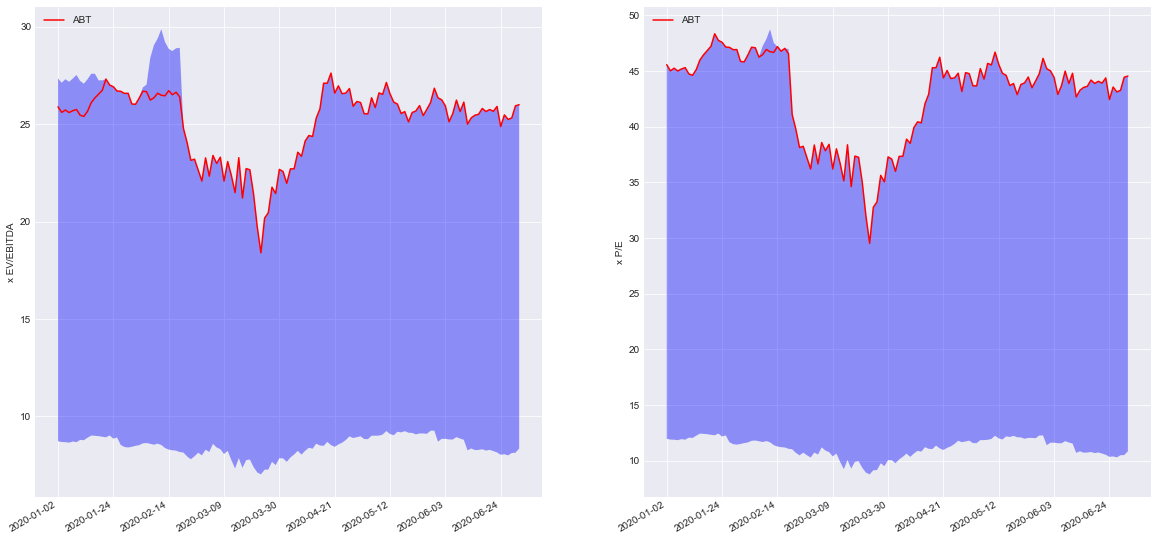

In [29]:
choice =['EV/EBITDA','P/E']
firm = "ABT"# Enter here the ticker of your target firm
style = 'seaborn-darkgrid' # Feel free to change the style and play around!
first_date = '2020-01-01' # Begin date for the graph (string type: 'YYYY-MM-DD')
last_date = '2020-07-01' # End date for the graph (string type: 'YYYY-MM-DD')

# Choosing a style for the graphs
plt.style.use(style)    
# Create a list of the subplots numbered ax1, ax2, etc.
ax_list = ['ax' + str(z+1) for z in range(len(choice))]
# Create a figure with several subplots side by side
fig, (ax_list) = plt.subplots(1,len(choice), figsize=(20,10))

for myindex in range(len(choice)):
    df_toplot = multiples[choice[myindex]].loc[first_date:last_date]# Dates here to be completed by you!]
    ax_list[myindex].plot(df_toplot.index #Index to use - to be completed by you!
        ,df_toplot[firm]  #Which target firm?- to be completed by you!
        ,label = firm, color='red')
    ax_list[myindex].fill_between(df_toplot.index, df_toplot['Max'], df_toplot['Min'], facecolor='blue', alpha=0.4)
    ax_list[myindex].set_ylabel('x '+choice[myindex])
    ax_list[myindex].xaxis.set_major_locator(plt.MaxNLocator(10)) # This helps in making the axis look good!
    ax_list[myindex].legend(loc='upper left')
    
fig.autofmt_xdate()

# **STEP 6: Interpret Results** 

#### Now that we have all the info and our algorithm done, let's discuss!

# $\color{red}{\textbf{TO-DO for Students in Step 6:}}$

#### **$\color{blue}{\textbf{Task 14}}$: Describe the historical behavior of your firm with respect to the industry in the period studied.  (Briefly! Use the Markdown feature of the notebook!)**

#### **$\color{blue}{\textbf{Task 15}}$: Describe the current position of your firm with respect to the industry. Also, give your own takeaway on how you see the future perspectives of the firm given the historical path. (Briefly! Use the Mardown feature of the notebook!)**